In [1]:
# pip install pandas numpy statsmodels matplotlib seaborn wordcloud beautifulsoup4 nltk scikit-learn imbalanced-learn openpyxl folium

# Importing Necessary libraries

In [2]:
import pandas as pd
import numpy as np
import re

from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import matplotlib.gridspec as gridspec
import folium

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data (stopwords, punkt, wordnet)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\knssn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\knssn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\knssn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Data

In [7]:
# Specify the local file path
file_path = r'D:\Naren\Capstone\fake_job_postings.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Text Cleaning and Preprocessing Function

In [8]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Cleaning function
def clean_text(text):
    # 1. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove 'url_' patterns (followed by any combination of letters and digits)
    text = re.sub(r'\burl_\w+\b', '', text)

    # 4. Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # 5. Remove numerical values
    text = re.sub(r'\d+', '', text)

    # 6. Convert to lowercase (case normalization)
    text = text.lower()

    # 7. Tokenize the text
    tokens = word_tokenize(text)

    # 8. Remove stop words and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and not word.startswith("url_")]

    # Return cleaned text as string
    return ' '.join(cleaned_tokens)

In [10]:
#filling na with empty space
df.fillna(' ', inplace=True)

# Machine Learning

## Cleaning Categorical Columns for Machine Learning

In [11]:
# Identify categorical columns 
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a new DataFrame to store the cleaned data
ml_df = df.copy()  

# Apply the cleaning function to each categorical column
for col in categorical_cols:
    ml_df[col] = ml_df[col].apply(clean_text)

# Display the cleaned DataFrame
ml_df.head()

C:\Users\knssn\AppData\Local\Temp\ipykernel_17196\2363770212.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,marketing intern,u ny new york,marketing,,food weve created groundbreaking awardwinning ...,food fastgrowing james beard awardwinning onli...,experience content management system major plu...,,0,1,0,,internship,,,marketing,0
1,2,customer service cloud video production,nz auckland,success,,second world cloud video production service se...,organised focused vibrant awesomedo passion cu...,expect youyour key responsibility communicate ...,get usthrough part second team gainexperience ...,0,1,0,fulltime,applicable,,marketing advertising,customer service,0
2,3,commissioning machinery assistant cma,u ia wever,,,valor service provides workforce solution meet...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,,0,1,0,,,,,,0
3,4,account executive washington dc,u dc washington,sale,,passion improving quality life geography heart...,company esri environmental system research ins...,education bachelor master gi business administ...,culture anything corporatewe collaborative cre...,0,1,0,fulltime,midsenior level,bachelor degree,computer software,sale,0
4,5,bill review manager,u fl fort worth,,,spotsource solution llc global human capital m...,job title itemization review managerlocation f...,qualificationsrn license state texasdiploma ba...,full benefit offered,0,1,1,fulltime,midsenior level,bachelor degree,hospital health care,health care provider,0


## Preprocessing Job Posting Data: Feature Separation and Text Transformation

In [12]:
# Separate the features and target
X = ml_df.drop(columns=['job_id','fraudulent', 'salary_range'])  # Dropping the salary column as decided
y = ml_df['fraudulent']

In [13]:
# Identify columns by data type
boolean_columns = ['telecommuting', 'has_company_logo', 'has_questions']
text_columns = X.select_dtypes(include=['object']).columns

# Impute missing values in the text columns before transformation
X[text_columns] = X[text_columns].fillna('')

# Process each text column individually and accumulate into a list
text_transformed_parts = []
for col in text_columns:
    text_pipeline = TfidfVectorizer(
        max_features=1000,  # Limit features for memory optimization
        stop_words='english',
        max_df=0.5,
        min_df=10,
        ngram_range=(1, 1)  # Unigrams only
    )

    # Fit-transform each text column independently
    transformed_col = text_pipeline.fit_transform(X[col])
    text_transformed_parts.append(transformed_col)

# Convert the transformed parts to a dense array and concatenate with boolean columns
X_text_preprocessed = np.hstack([part.toarray() for part in text_transformed_parts])
X_preprocessed = np.concatenate([X[boolean_columns].values, X_text_preprocessed], axis=1)

print("Shape of preprocessed features:", X_preprocessed.shape)

Shape of preprocessed features: (17880, 5402)


In [32]:
# divya
X_preprocessed[5166]

array([0., 0., 1., ..., 0., 0., 0.])

In [31]:
y[5166]

np.int64(1)

## Checking for Class Imbalance

C:\Users\knssn\AppData\Local\Temp\ipykernel_17196\2713891141.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraudulent_percentage.index, y=fraudulent_percentage.values, palette='viridis')


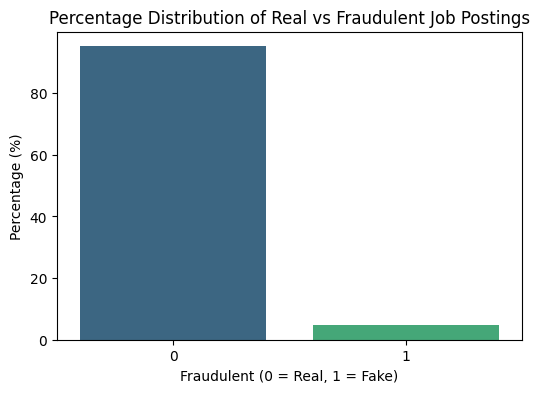

In [14]:
# Calculate percentage of real vs fraudulent job postings
fraudulent_percentage = df['fraudulent'].value_counts(normalize=True) * 100

# Plot the percentage of real vs fraudulent job postings
plt.figure(figsize=(6, 4))
sns.barplot(x=fraudulent_percentage.index, y=fraudulent_percentage.values, palette='viridis')
plt.title('Percentage Distribution of Real vs Fraudulent Job Postings')
plt.xlabel('Fraudulent (0 = Real, 1 = Fake)')
plt.ylabel('Percentage (%)')
plt.show()


The dataset is highly imbalanced, with 97.8% non-fraudulent (0) and only 2.2% fraudulent (1) instances. To address this imbalance, we can use various sampling techniques:

1. Oversampling
    * Random Oversampling: Duplicates fraudulent samples until the classes are balanced.
    * SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic fraudulent samples by interpolating between existing samples. This method is particularly effective as it preserves the minority class characteristics without simple duplication.
2. Undersampling
    * Random Undersampling: Reduces the number of non-fraudulent samples randomly until the classes are balanced.
    * Cluster Centroids: Uses clustering to identify representative points from the majority class and reduces its size, maintaining diversity.
3. Hybrid Methods
    * SMOTE + Tomek Links: Combines SMOTE with Tomek Links, which removes overlapping samples, enhancing class boundaries and reducing noise.
    * SMOTE + Edited Nearest Neighbors (ENN): First applies SMOTE, then removes ambiguous majority class samples using ENN.

* Recommended Approach: SMOTE + Tomek Links
    * SMOTE is highly effective for generating synthetic minority class samples. Pairing it with Tomek Links further cleans up class boundaries and reduces noise, leading to better model training and more accurate predictions.

* Imbalanced-learn (imblearn) Library
    * Oversampling: Includes methods like SMOTE, ADASYN, and RandomOverSampler.
    * Undersampling: Includes techniques like RandomUnderSampler, Tomek Links, and ENN.
    * Hybrid Techniques: SMOTE + Tomek Links or SMOTE + ENN combine oversampling and undersampling for balanced, clean datasets.

For this problem, SMOTE + Tomek Links is the top choice, offering an effective balance of synthetic sample generation and class boundary cleaning for better model performance.

## Resampling Job Posting Data to address imbalance

In [15]:
# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_smote, y_smote = smote.fit_resample(X_preprocessed, y)

# Apply Tomek Links for undersampling
tomek = TomekLinks(sampling_strategy='majority')
X_resampled, y_resampled = tomek.fit_resample(X_smote, y_smote)

C:\Users\knssn\AppData\Local\Temp\ipykernel_17196\2843404409.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_final_distribution.index, y=y_final_distribution.values, palette='viridis')


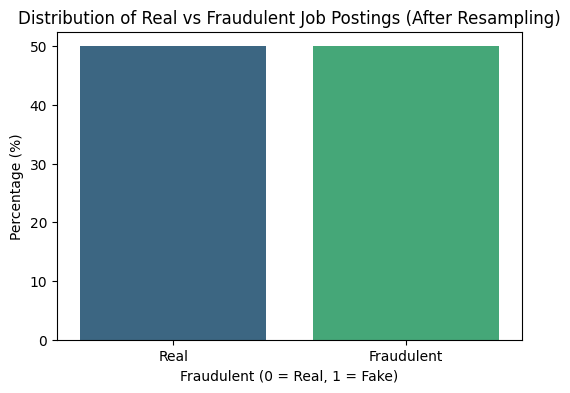

In [16]:
# Checking the class distribution of the final dataset (after SMOTE and Tomek Links)
y_final_distribution = pd.Series(y_resampled).value_counts(normalize=True) * 100

# Plotting the distribution of Real vs Fraudulent job postings after resampling
plt.figure(figsize=(6, 4))
sns.barplot(x=y_final_distribution.index, y=y_final_distribution.values, palette='viridis')
plt.title("Distribution of Real vs Fraudulent Job Postings (After Resampling)")
plt.xlabel("Fraudulent (0 = Real, 1 = Fake)")
plt.ylabel("Percentage (%)")
plt.xticks([0, 1], labels=['Real', 'Fraudulent'])
plt.show()

## Data Splitting: Training, Validation, and Test Sets

In [18]:
X_resampled.shape

(34028, 5402)

In [20]:
# Initial split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Further split the training set into training and validation sets 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

# Print shapes to verify the splits
print("Training set shape:", X_train.shape)

print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Testing labels shape:", y_test.shape)


Training set shape: (19055, 5402)
Validation set shape: (8167, 5402)
Testing set shape: (6806, 5402)
Training labels shape: (19055,)
Validation labels shape: (8167,)
Testing labels shape: (6806,)


In [23]:
X_test[0]

array([1., 1., 0., ..., 0., 0., 0.])

## Model Training and Evaluation with ROC, Precision-Recall, and Learning Curves

In [24]:
# # Function to plot ROC Curve
# def plot_roc_curve(model, y_val, y_pred_prob):
#     fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
#     auc_score = roc_auc_score(y_val, y_pred_prob)
#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc_score:.2f})')
#     plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.legend()
#     plt.show()

# # Function to plot Precision-Recall Curve
# def plot_precision_recall_curve(model, y_val, y_pred_prob):
#     precision, recall, _ = precision_recall_curve(y_val, y_pred_prob)
#     plt.figure(figsize=(8, 6))
#     plt.plot(recall, precision, label=f'{model.__class__.__name__}')
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.title('Precision-Recall Curve')
#     plt.legend()
#     plt.show()

# # Function to plot Learning Curve
# def plot_learning_curve(model, X_train, y_train):
#     train_sizes, train_scores, val_scores = learning_curve(
#         model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
#     )
#     train_mean = np.mean(train_scores, axis=1)
#     train_std = np.std(train_scores, axis=1)
#     val_mean = np.mean(val_scores, axis=1)
#     val_std = np.std(val_scores, axis=1)

#     plt.figure(figsize=(10, 6))
#     plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
#     plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
#     plt.plot(train_sizes, val_mean, 'o-', color='orange', label='Validation Accuracy')
#     plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='orange')
#     plt.xlabel('Training Size')
#     plt.ylabel('Accuracy')
#     plt.title(f'Learning Curve: {model.__class__.__name__}')
#     plt.legend(loc='best')
#     plt.show()

# Function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val):
    print(f"Evaluating Model: {model.__class__.__name__}")
    y_pred = model.predict(X_val)
    y_pred_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    # Print classification report
    print("Classification Report:\n", classification_report(y_val, y_pred))

    # # ROC Curve
    # if y_pred_prob is not None:
    #     plot_roc_curve(model, y_val, y_pred_prob)

    # # Precision-Recall Curve
    # if y_pred_prob is not None:
    #     plot_precision_recall_curve(model, y_val, y_pred_prob)

    # # Learning Curve
    # plot_learning_curve(model, X_train, y_train)

models = {
    "Logistic Regression": LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=1000),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42
    ),
    "k-NN": KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean'),
    "MLP": MLPClassifier(
        hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.001, max_iter=1000, random_state=42
    ),
    "Naive Bayes": GaussianNB(var_smoothing=1e-9),
}

# Train, Evaluate, and Visualize Results
for name, model in models.items():
    print("=" * 80)
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    evaluate_model(model, X_train, X_val, y_train, y_val)


Training Logistic Regression...
Evaluating Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      4084
           1       0.98      1.00      0.99      4083

    accuracy                           0.99      8167
   macro avg       0.99      0.99      0.99      8167
weighted avg       0.99      0.99      0.99      8167

Training Random Forest...
Evaluating Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      4084
           1       0.96      1.00      0.98      4083

    accuracy                           0.98      8167
   macro avg       0.98      0.98      0.98      8167
weighted avg       0.98      0.98      0.98      8167

Training k-NN...
Evaluating Model: KNeighborsClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00    

## Testing and Evaluating Selected Models on Test Data with ROC and Precision-Recall Curves

In [ ]:
X_test.shape

(6806, 5444)

In [33]:
models["Logistic Regression"].predict(X_preprocessed[5166].reshape(1, -1))

array([1])

In [ ]:
# Define models to test
selected_models = {
    "Logistic Regression": models["Logistic Regression"],
    "Random Forest": models["Random Forest"],
    "Naive Bayes": models["Naive Bayes"],
}

# Function to evaluate models on test data
def test_selected_models(models_to_test, X_test, y_test):
    for name, model in models_to_test.items():
        print("=" * 80)
        print(f"Testing Model: {name}...")
        y_test_pred = model.predict(X_test)
        y_test_pred_prob = (
            model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        )

        # Print classification report
        print(f"Classification Report for {name} on Test Data:\n")
        print(classification_report(y_test, y_test_pred))

        # # Plot ROC Curve
        # if y_test_pred_prob is not None:
        #     plot_roc_curve(model, y_test, y_test_pred_prob)

        # # Plot Precision-Recall Curve
        # if y_test_pred_prob is not None:
        #     plot_precision_recall_curve(model, y_test, y_test_pred_prob)

# Test the selected models
print("\n" + "=" * 80)
print("Testing Selected Models on Test Set")
test_selected_models(selected_models, X_test, y_test)



Testing Selected Models on Test Set
Testing Model: Logistic Regression...
Classification Report for Logistic Regression on Test Data:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3403
           1       0.99      1.00      0.99      3403

    accuracy                           0.99      6806
   macro avg       0.99      0.99      0.99      6806
weighted avg       0.99      0.99      0.99      6806

Testing Model: Random Forest...
Classification Report for Random Forest on Test Data:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3403
           1       0.96      1.00      0.98      3403

    accuracy                           0.98      6806
   macro avg       0.98      0.98      0.98      6806
weighted avg       0.98      0.98      0.98      6806

Testing Model: Naive Bayes...
Classification Report for Naive Bayes on Test Data:

              precision    recall  f1-sc

In [ ]:
import joblib

# Save the logistic regression model
#joblib.dump(models["Logistic Regression"], "logistic_regression_model.pkl")


['logistic_regression_model.pkl']

In [36]:
X_preprocessed.shape

(17880, 5402)

In [37]:
X_test.shape

(6806, 5402)

In [41]:
# Save the logistic regression model
joblib.dump(models["Logistic Regression"], "logistic_regression_model.pkl")
joblib.dump(models["Naive Bayes"], "Naive_Bayes_model.pkl")
joblib.dump(models["Random Forest"], "Random Forest_model.pkl")

['Random Forest_model.pkl']

In [42]:
import joblib

# Load your trained model
model_lr = joblib.load(r'logistic_regression_model.pkl')
model_nb = joblib.load(r'Naive_Bayes_model.pkl')
model_rf = joblib.load(r'Random Forest_model.pkl')


# Perform prediction
prediction_lr = model_lr.predict(X_preprocessed[5166].reshape(1, -1))
prediction_nb = model_nb.predict(X_preprocessed[5166].reshape(1, -1))
prediction_rf = model_rf.predict(X_preprocessed[5166].reshape(1, -1))


In [44]:
prediction_lr, prediction_nb, prediction_rf

(array([1]), array([1]), array([1]))

In [66]:
len(y_test)

6806

In [92]:
print('X_test = ', X_test[0].reshape(1, -1), "          , y_test = " + str(y_test.iloc[0]), '        , predicted:', model_lr.predict(X_test[0].reshape(1, -1))[0])

X_test =  [[1. 1. 0. ... 0. 0. 0.]]           , y_test = 1         , predicted: 1


In [97]:
X_preprocessed, type(X_preprocessed[0][0])

(array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]),
 numpy.float64)

In [98]:
import numpy as np

# Save the array to a binary .npy file
np.save('X_preprocessed.npy', X_preprocessed)

# To load the array later
X_loaded = np.load('X_preprocessed.npy')


In [106]:
print(model_lr.predict(X_loaded[5166].reshape(1, -1))[0])

1
